# Predict component failure related with Air Pressure System at Scania Trucks using various machine learning methods

<p align="justify">

Analysis of data generated by the vehicle ECU’s( electronic control unit) can be very helpful in vehicle maintenance and reducing potential breakdown. The main objective of this paper is to perform predictive analysis on Air pressure system data from Scania Trucks for component failure using Naïve Bayes, Logistic Regression, Random Forest, Support vector machine and k-Nearest Neighbor machine learning methods. Since data-preprocessing is an important step in overall process of machine learning so techniques for handling missing values , feature scaling and class imbalance  would also be covered. 15 different metrics would be used to compare the result of all the implemented machine learning methods.

Author - Sushil Dutt Rawat <br>
Date: 26/11/2020

</p>

In [1]:
# import pandas and numpy lib packages for data manipulation
import pandas as pd
import numpy as np
import time
import humanfriendly as hf

# import graphical packages for visual charts
import matplotlib.pyplot as plt
import seaborn as sns

# import Sci-kit machine learning packages
# for data splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from plot_metric.functions import BinaryClassification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# for feature extraction methods
from sklearn.decomposition import PCA

# machine learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

D:\Python\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read the training and test data into pandas dataframe for exploratory analysis

In [2]:
# training data
aps_train_df=pd.read_csv('APS/aps_failure_training_set.csv',header='infer',skiprows=20)
pd.set_option('display.max_columns',len(aps_train_df.columns))
aps_train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [3]:
# Test subset
aps_test_df=pd.read_csv('APS/aps_failure_test_set.csv',header='infer',skiprows=20)
aps_test_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,na,na,na,na,na,100120,59816.46,4201350,4201350,4203050,29967.0,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,na,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,387

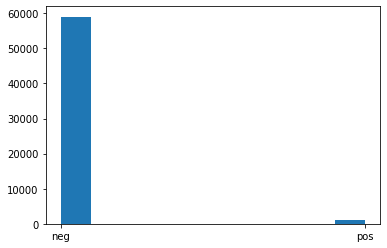

In [4]:
plt.hist(aps_train_df['class'])
plt.show()

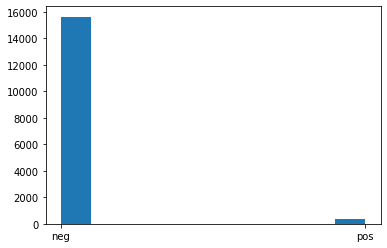

In [5]:
plt.hist(aps_test_df['class'])
plt.show()

In [6]:
# replace 'na' with NaN
aps_train_df.replace('na',np.nan,inplace=True)
aps_test_df.replace('na',np.nan,inplace=True)

In [7]:
# replace 'neg' with 0 and 'pos' with 1 in 'Class column'
remap = {'neg': 0, 'pos': 1}
aps_train_df['class'].replace(remap, inplace=True)
aps_test_df['class'].replace(remap, inplace=True)
aps_train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,NaN,NaN,NaN,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,NaN,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,NaN,NaN,NaN,NaN,NaN,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,NaN,NaN,NaN,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,NaN,0,3646660,NaN,6160,796,164860,350066,272956,1837600,301242,9148,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,NaN,NaN,NaN,NaN,NaN,NaN,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,NaN,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10580,12.69,21614,21614,

## Missing value handling : Replace with median value 

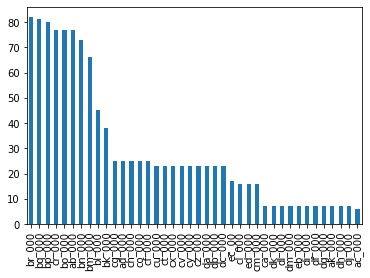

In [8]:
# find missing value % in training dataset
missing_values_train=aps_train_df.isna().mean().round(2)*100
missing_values_train[missing_values_train > 5].sort_values(ascending=False).plot.bar()

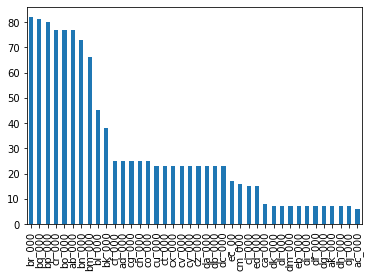

In [9]:
# find missing value % in  testing dataset
missing_values_test=aps_test_df.isna().mean().round(2)*100
missing_values_test[missing_values_test > 5].sort_values(ascending=False).plot.bar()

In [10]:
# replace all the null values with the median of features
aps_train_df.replace(np.nan,aps_train_df.median(),inplace=True)

## Create X and y : Training and testing data subsets

In [11]:
# create X_train and y_train data subset for training
y_train=aps_train_df['class']
X_train = aps_train_df.drop(columns='class',axis=1).apply(pd.to_numeric)

In [12]:
aps_test_df.replace(np.nan,aps_test_df.median(),inplace=True)

In [13]:
# create X_test and y_test data subset for testing
y_test=aps_test_df['class']
X_test =aps_test_df.drop(columns='class').apply(pd.to_numeric)

## Check correlation between features in training dataset

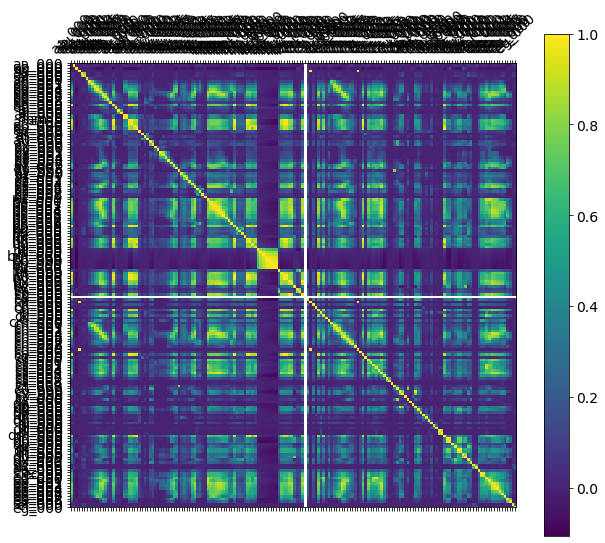

In [14]:
# correlation matix
fig = plt.figure(figsize=(10,9))
plt.matshow(X_train.corr(), fignum=fig.number)

plt.xticks(range(X_train.shape[1]), X_train.columns, fontsize=14, rotation=45)
plt.yticks(range(X_train.shape[1]), X_train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix- Training DataSet \n\n\n\n', fontsize=16);

plt.show()

## Convert all the columns to numeric type for machine learning: Both Train & Test Data
#### since all the columns contain numeric value so using pandas function .to_numeric for conversion

In [15]:
features_train=X_train.columns

In [16]:
X_train=X_train.apply(pd.to_numeric)

In [17]:
X_train.describe().astype(int)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
mean,59336,0,336225812,143438,6,10,219,964,8509,87600,432249,1097947,1649682,495058,35192,5057,1801250,8922,1131,907,58497,92303,3444533,2989100,997237,439816,0,125,5018,228,1076,361,12075,10076,10852,7144,10447,110726,1068370,1532641,1040428,1149,7785,4378,7987,86305,1461292,2117594,100758,17183,654,41,1391394,888952,410493,272403,203694,187737,209017,183708,35471,35356,4502898,544,882,1322,71,1800799,57605,489141,506597,253644,276431,293833,307984,325894,342073,357311,371304,79999,59336,4490498,4490499,4011609,21954,97380,38171,404105,3711515,1209600,61802,143107,80,0,3472063,102262,711728,288,287,2309,21700,159206,525793,1274083,1333758,406965,63801,19027,7731,143330,545,4490499,8,5454,783,236377,352768,440290,2224074,542373,14674,209,770,625,1005,1756752,280848,211,14962,5,10,2093445,3050,364,2537,5235,4392,34761,37,1737,26635,7393,33521,27684,6757,4323590,194502,87759,15081,3882734,568244,755300,7427,0,1,9109699,1250,1353,728117,778988,443122,210018,443226,391665,330367,342858,137221,8295,0,0
std,145430,1,776762540,35045247,158,205,20363,34008,149481,757517,2361408,3245793,3888214,1415350,218946,168707,4164013,162422,50095,72998,536606,845058,7750183,6787285,3072609,1256525,5,10952,118988,15716,6462,1452,451949,532270,425936,205311,352639,1386815,3261959,5079105,3969943,97411,73226,33807,106004,649652,4163211,6426221,894788,278877,14841,3238,3756155,2333005,1189450,744383,536071,506462,633594,522487,242294,333421,10830363,3954,4725,9058,535,4158603,151427,1478197,1811488,207887,240816,249528,257487,258233,257715,256740,255870,84063,145251,10799636,10799636,10075410,53786,614834,35568,367406,9368796,0,140366,35045248,322,0,8333312,1131998,2174840,4317,1552,60833,244399,1067864,2204208,3338968,3127339,1287211,404161,185209,264963,35045247,7595,10799636,

In [18]:
X_test.describe().astype(int)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000
mean,67996,0,337317831,362,6,9,119,2039,13629,111297,484791,1164099,1689266,501765,35517,5716,1907821,11652,1242,859,70138,110960,3642535,3163662,1068813,471713,0,692,5606,554,1202,373,24953,15441,12614,7590,8538,85662,1083419,1582595,1170474,1128,8015,4683,7888,88496,1514659,2244637,104012,19546,524,20,1461124,935711,433410,288922,216838,197348,213494,188358,37272,41696,4777871,533,898,1367,78,1909503,61537,511436,554894,253961,276664,294097,306742,321299,336862,349452,361356,81296,68005,4763241,4763242,4196130,22864,103862,38863,409700,3898062,1209600,61432,31,81,0,3646810,116537,755158,358,301,3914,31495,182715,574291,1348218,1368594,405852,65179,21009,8653,226,462,4763242,11,5654,800,256187,375533,481089,2328985,548865,14448,378,1923,628,987,1766308,288026,140,13111,5,9,2105159,3292,363,21502,11540,2593,33101,1,839,28053,7019,35877,29033,7071,3524266,191121,91310,15638,4155955,614987,745552,7680,0,1,10018975,1277,1409,779924,799565,462226,219923,466216,422909,352811,348676,142592,8457,0,0
std,503534,1,777803947,1351,115,163,6416,88729,234448,1019838,2778466,3623978,4040674,1385274,240668,170393,4532198,225636,51334,87090,645841,1007579,8429446,7394348,3408274,1373248,4,57607,126000,47333,6954,1469,1005771,646268,468621,215207,262812,762451,3304252,4993114,5190857,51479,63318,30252,50203,714048,4456336,7364896,887148,260452,11567,1243,3977889,2610593,1270471,806106,593549,552283,637049,545990,246710,420878,11841284,3166,4655,7711,550,4532778,164712,1563219,2044774,206050,238194,249464,254525,253492,253466,252543,251657,85579,503507,11802090,11802091,11284263,56086,669579,35799,368575,10579653,0,139509,874,325,0,8752638,1365429,2302408,4618,1902,113126,462094,1310827,2595965,3753626,3249881,1105155,359709,216979,171666,1519,5072,11802090,518,13008,2247,1

## check data distribution

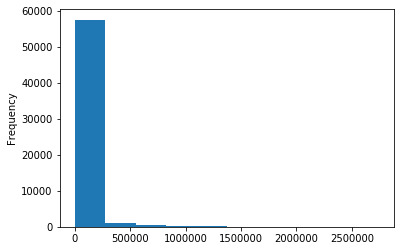

In [19]:
X_train[features_train[0]].plot(kind='hist')

In [20]:
# log_val=np.log(X_train[features_train[0]]+1)

In [21]:
# log_val.plot(kind='bar')

### Perform scaling using standar scalar because its neccessary for PCA

This is absolutely neccessary because PCA calculates a new projection of our data on a new axis using the standard deviation of our data << source towardsDataScience blog>>

In [22]:
scalar =StandardScaler()
scalar.fit(X_train)

StandardScaler()

In [23]:
X_train_std = scalar.transform(X_train)
X_test_std  = scalar.transform(X_test)

In [24]:
X_train_std.shape,X_test_std.shape

((60000, 170), (16000, 170))

In [25]:
pd.DataFrame(data=X_train_std,columns=features_train).head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.119381,-0.096307,2.310224,-0.004085,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.167274,0.103186,0.518102,0.362192,-0.042459,-0.029978,0.180223,-0.054934,-0.022591,-0.012434,-0.109015,-0.109228,0.192095,0.098135,0.250203,0.550907,-0.088073,-0.011451,-0.04218,-0.014518,-0.009916,-0.064343,-0.026718,-0.018931,-0.025479,-0.034801,-0.029628,0.258355,0.972212,-0.163286,-0.071677,-0.011802,-0.032929,-0.067166,-0.036539,-0.113842,-0.203221,0.530438,-0.109949,-0.061603,-0.044093,-0.012847,0.249553,0.057159,0.004152,0.019918,0.198765,0.974940,1.435939,-0.344766,-0.146400,-0.106043,0.202886,-0.137658,-0.184726,-0.134124,-0.040790,0.180566,0.263580,0.310116,0.161681,0.370950,0.319619,0.021345,-0.010814,-0.163476,-0.20858,-0.203365,-0.198947,1.172227,0.119525,0.204612,0.204612,0.256893,0.401803,-0.046719,0.446813,0.637595,0.262185,0.0,1.314011,-0.004083,0.048776,-0.012911,0.212845,-0.090339,0.094187,-0.065408,1.053696,-0.037972,-0.088790,-0.149090,-0.184919,0.010599,0.611842,0.756989,0.086650,-0.042222,-0.023110,-0.004084,-0.040174,0.204612,-0.017218,0.489485,0.154101,0.026156,0.152996,-0.005582,0.320927,0.303646,0.146407,-0.009102,-0.004203,-0.018961,-0.040464,0.733061,-0.172136,-0.027322,2.384944,-0.034052,0.118646,0.896340,0.180406,0.461154,-0.019123,-0.025984,-0.008116,-0.084558,-0.008511,-0.026999,-0.025164,-0.027578,0.297120,0.970930,1.904942,-0.045393,-0.145658,0.564595,0.691140,0.958719,0.641848,-0.186078,-0.128261,-0.019481,-0.028615,-0.152539,0.370080,0.419294,0.098933,0.363023,0.693832,0.524393,0.239087,0.070072,0.008264,-0.107586,-0.143103,-0.175699,-0.020257,-0.023540
1,-0.180697,-0.096307,-0.432859,-0.004089,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.175319,-0.136995,0.018291,0.015307,-0.016214,-0.029978,-0.097959,-0.054934,-0.021233,-0.012434,-0.109015,-0.109228,-0.114016,-0.126996,0.028432,-0.080598,-0.088073,-0.011451,-0.04218,-0.014518,-0.166506,-0.248817,-0.026718,-0.018931,-0.025479,-0.034801,-0.029628,-0.028279,-0.090637,0.091411,-0.237000,-0.011802,-0.006136,0.101439,0.054609,-0.112706,-0.108383,-0.037922,-0.096149,-0.061595,-0.044093,-0.012847,-0.003413,-0.189365,-0.177379,-0.158663,-0.123892,-0.096888,-0.068040,0.087933,0.213008,-0.091922,-0.079060,-0.115911,-0.090763,-0.105861,0.519465,-0.097978,-0.056642,0.134741,-0.063147,0.422228,0.346112,0.291456,-0.219758,-0.213896,-0.20858,-0.203365,-0.198947,-0.871968,-0.180925,-0.078136,-0.078137,-0.042636,-0.078494,0.264690,2.177647,-1.081117,-0.082046,0.0,-0.440299,-0.004083,-0.106026,-0.012911,-0.141720,-0.090339,-0.031355,-0.066798,-0.185446,-0.037972,-0.088790,-0.149055,-0.193790,-0.028327,-0.015036,-0.054830,-0.068062,-0.074704,-0.028967,-0.004090,-0.071771,-0.078137,-0.017218,0.068783,0.004303,-0.059157,-0.002446,-0.081126,-0.069222,-0.207496,-0.069425,-0.018610

### Perform PCA

In [26]:
pca = PCA(n_components=0.95,random_state=0)

In [27]:
# fit the PCA instance on the training data
pca.fit(X_train_std)

PCA(n_components=0.95, random_state=0)

In [28]:
# find out how many n_components PCA used to capture 0.95 variance
pca.n_components_

81

In [29]:
# apply transform on both the training and test set to generate a transformed dataset from 
# the parameters generated from the fit method.

X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [30]:
X_train_pca.shape

(60000, 81)

In [31]:
df=pd.DataFrame(data=X_train_pca)

In [32]:
result_df=pd.concat([df,y_train],axis=1).head()
result_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,class
0,2.374500,-1.127649,-0.870419,1.728910,-0.061791,0.755184,0.397274,0.002816,-0.358144,-1.403681,-0.940549,0.172137,-0.138384,-0.118986,0.071234,0.101539,0.096224,0.147531,0.112059,0.543561,0.130456,-0.282037,-1.114068,-0.261297,-0.416451,0.151017,0.298157,0.239333,-0.177831,-0.408674,0.484975,0.699332,-0.792991,0.404270,-1.668187,-0.159027,-0.045428,-0.117666,-0.105250,-0.071017,-0.924658,0.162772,0.615844,-0.322803,-0.132364,-0.715353,-0.267217,-0.890884,-0.569033,-0.309038,0.239033,0.226287,-0.069421,-0.601268,-0.228479,-0.376252,-0.323762,0.298034,-0.524366,-0.176195,-0.101255,-0.486563,-0.050792,-0.283148,0.744831,0.287803,0.165731,-0.892098,-0.419719,-0.469568,-0.299030,-0.262166,-0.271623,0.223392,-0.199515,-0.523401,-0.096364,0.353504,0.453524,0.006063,-0.200571,0
1,-0.615524,-0.550443,-0.035569,0.088882,-0.137165,0.109337,0.174648,-0.006077,0.139655,0.244997,-0.149445,0.185142,-0.129592,-0.170158,0.008450,0.194601,-0.060724,-0.027536,-0.079009,0.273661,-0.066253,0.123559,-0.129465,-0.028119,-0.222711,0.074532,0.091236,-0.154160,-0.028523,-0.137996,-0.178502,-0.162963,0.128095,0.198716,0.455463,0.108819,-0.089184,-0.075892,0.011658,0.030933,-0.019564,-0.107139,-0.010103,0.001185,-0.028236,0.151822,0.007624,0.011714,0.142094,-0.142257,-0.038657,0.239890,-0.158367,0.077678,-0.148353,0.095644,0.083693,0.054222,-0.022311,0.154948,0.001195,0.098611,-0.096569,0.069310,-0.030529,0.128866,0.049077,-0.041747,-0.280315,0.159957,-0.248505,-0.159404,-0.296381,-0.341378,0.051263,0.155312,-0.052454,-0.128325,-0.430424,0.105012,0.097979,0
2,-1.205852,-0.059721,-0.771610,-0.500972,-0.038004,0.089637,-0.081018,-0.017045,-0.107396,0.156670,0.448587,-0.375795,-0.138536,0.120405,0.045024,-0.072344,-0.140695,0.316526,0.129870,0.051061,-0.046073,-0.063013,-0.242549,-0.097297,0.133448,-0.115616,-0.011340,-0.013714,-0.176171,-0.100041,-0.301292,-0.108139,0.334097,0.101832,0.125068,-0.030671,-0.214251,0.031899,0.009115,0.151591,-0.210273,-0.073060,-0.053444,-0.027297,-0.138193,0.118107,0.184757,0.002387,0.051314,-0.046951,-0.104011,-0.110679,0.211356,-0.148921,-0.044354,-0.164248,-0.012011,-0.027524,-0.005495,-0.002620,0.169015,0.454691,0.228621,-0.092730,-0.048267,-0.165159,-0.098641,0.025365,0.005810,-0.010415,-0.017537,0.045184,-0.021541,0.041154,0.069081,-0.033483,-0.062142,-0.003478,0.110315,0.074286,-0.001635,0
3,-3.188903,0.251461,-0.285778,-0.869549,0.327271,-0.241293,-0.238053,-0.020669,0.583821,1.030810,0.798030,-0.626399,0.988093,0.468368,-0.100866,0.392533,0.477512,-0.053999,0.914209,0.053478,0.235828,0.573472,-0.117575,0.005168,-0.029810,-0.029090,-0.124706,0.117451,0.731828,0.704804,-0.551248,1.703557,0.763145,0.823820,0.222246,-0.511835,-0.268950,0.013576,0.062628,-0.063249,0.473010,-0.916714,-0.093413,-0.177922,-0.237704,-0.007361,0.014215,-0.193379,-0.000036,0.032509,0.189569,0.355049,0.678226,1.320964,-1.110487,-0.631811,-0.011656,-0.612563,-0.200246,-0.067272,0.087575,0.042250,0.050407,0.154560,-0.007654,-0.091008,-0.084553,0.004382,-0.124038,0.055340,-0.004394,0.052623,0.095923,0.201659,-0.117960,-0.078946,0.081984,-0.300906,-0.088125,-0.038142,-0.201358,0
4,0.323156,-0.064226,-0.612063,0.688140,-0.565306,0.215714,0.068441,0.007874,-0.514091,-1.137268,-0.752545,0.480273,-0.079104,-0.190427,0.069940,-0.294338,0.138241,-0.015471,0.098630,-0.260449,-0.011939,0.078950,0.300247,0.095410,0.156811,-0.147134,-0.190895,-0.187483,0.013758,-0.020175,-0.435800,-0.247056,0.530282,-0.053502,0.052281,0.045712,-0.309375,0.029878,-0.079613,0.065631,-0.128668,-0.003022,0.134743,0.037160,-0.011227,-0.167565,0.078304,-0.112375,0.150483,-0.121925,0.035063,-0.196179,0.124867,0.024698,-0.019138,0.023603,0.192338,0.018600,-0.021332,-0.138548,0.233788,-0.561436,-0.192129,-0.015495,0.493872,0.209227,0.065943,-0.23

In [33]:
# variance explained by principal components
print("Variance of each component :",pca.explained_variance_ratio_)

Variance of each component : [0.2875213  0.0472864  0.04277577 0.03581134 0.02896582 0.02354725
 0.01948788 0.01775205 0.0176111  0.01554732 0.01430684 0.01389102
 0.01229215 0.01169147 0.01137123 0.01086041 0.01020759 0.0101107
 0.00974146 0.00971715 0.00939143 0.00917688 0.00899566 0.0087441
 0.00789394 0.00775902 0.00761638 0.00726673 0.00711572 0.00695315
 0.00688894 0.0067686  0.0066388  0.00651155 0.00648354 0.00640318
 0.00616453 0.00601861 0.00593526 0.00591137 0.00584779 0.00575105
 0.0056284  0.00560689 0.00554007 0.00544529 0.00529056 0.00520895
 0.00493001 0.00486367 0.00460297 0.00454323 0.00445018 0.00429156
 0.0042431  0.00416236 0.00408715 0.0039796  0.00392282 0.00374134
 0.00366111 0.0036006  0.00356325 0.00340225 0.0033793  0.00330922
 0.00314446 0.00301189 0.00288663 0.00282321 0.00273825 0.00265027
 0.00256873 0.0025301  0.00244011 0.00235512 0.00227381 0.00216872
 0.00211549 0.00209611 0.00203093]


In [34]:
print("Total Variance Explained: ", np.round(sum(list(pca.explained_variance_ratio_))*100,2))

Total Variance Explained:  95.0


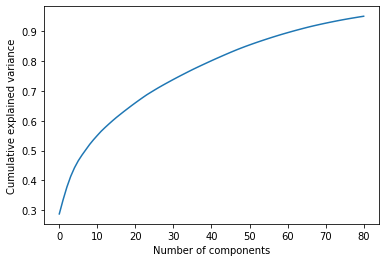

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.savefig('PCA_Components',dpi=300)
plt.show()

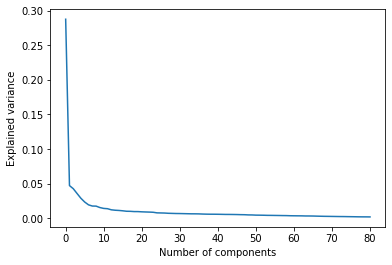

In [36]:
# plt.subplots(figsize=(15,10))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
# plt.xticks(np.arange(0,85,step=1))

plt.savefig('PCA_Components_Variance',dpi=300)
plt.show()

In [37]:
pca.explained_variance_

array([48.59190949,  7.99153483,  7.22922577,  6.05221761,  4.89530596,
        3.97955123,  3.29350636,  3.00014603,  2.97632518,  2.62754045,
        2.41789642,  2.34762118,  2.07740775,  1.97589146,  1.92177038,
        1.83543994,  1.72511223,  1.70873672,  1.64633485,  1.642226  ,
        1.58717811,  1.55091814,  1.5202921 ,  1.47777766,  1.33409735,
        1.31129707,  1.28718966,  1.22809754,  1.20257689,  1.17510193,
        1.16425038,  1.14391245,  1.12197624,  1.10047028,  1.09573717,
        1.08215556,  1.04182282,  1.01716253,  1.00307619,  0.99903745,
        0.9882931 ,  0.97194361,  0.951215  ,  0.94758002,  0.93628783,
        0.9202686 ,  0.89411982,  0.88032787,  0.8331858 ,  0.82197349,
        0.77791563,  0.76781853,  0.75209215,  0.72528523,  0.71709566,
        0.70344978,  0.69073915,  0.67256318,  0.66296688,  0.63229624,
        0.61873857,  0.6085113 ,  0.60219853,  0.57498954,  0.57111061,
        0.55926738,  0.53142275,  0.50901717,  0.48784792,  0.47

#####  check PCA result on test data frame

In [38]:
X_test_pca.shape,

((16000, 81),)

In [39]:
df_test=pd.DataFrame(data=X_test_pca)

In [40]:
result_df_test=pd.concat([df_test,y_test],axis=1).head()
result_df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,class
0,-3.080396,0.168373,-0.312004,-0.822630,0.320144,-0.301619,-0.154538,-0.009180,0.320796,0.528722,0.296342,-0.233746,0.027959,-0.106118,-0.027596,-0.001041,-0.020391,-0.146084,-0.013696,-0.055465,-0.040189,0.089383,0.200795,0.137140,-0.077225,0.046780,0.001976,-0.156899,-0.006506,0.040218,-0.063591,-0.155983,0.056758,0.050929,0.322021,0.139260,-0.139589,0.032032,-0.037049,-0.001176,0.047788,-0.073467,0.003740,-0.038180,0.025877,0.068242,0.036574,-0.007944,-0.000346,-0.171935,0.033849,-0.047989,-0.037634,0.159850,-0.041924,0.049874,0.057480,0.050114,-0.068745,-0.062714,-0.142118,-0.220977,-0.033441,0.030456,0.130417,0.059573,-0.029053,0.023030,0.031405,-0.012877,-0.033167,0.015483,0.068931,0.031898,-0.002197,-0.090891,-0.035910,0.048997,0.165619,-0.079127,-0.067177,0
1,-3.161746,0.175403,-0.305406,-0.919001,0.371518,-0.243728,-0.225475,-0.019225,0.462580,0.859486,0.744108,-0.619966,-0.035616,0.056568,-0.044652,0.025302,-0.067401,0.063662,0.029069,0.033460,-0.033061,0.002895,0.019321,0.042278,0.005893,-0.017986,0.021912,-0.054602,-0.019269,0.050397,-0.105189,-0.146870,0.085390,0.003184,0.237937,0.109297,-0.108363,0.011552,-0.020394,0.023580,0.022765,-0.098220,-0.029819,-0.004522,-0.007001,0.077832,0.049812,0.006779,0.034960,-0.089406,0.000751,-0.049068,0.016233,0.111244,-0.024092,0.026534,0.059170,0.017073,-0.020498,-0.012222,-0.058757,-0.021059,0.026743,0.043823,-0.005392,0.010007,-0.043464,-0.012010,0.024905,-0.001339,-0.025358,-0.005144,0.012603,0.026177,0.006472,-0.049613,0.006762,0.047185,0.049988,-0.027290,-0.045388,0
2,1.107639,2.427036,-0.646794,1.228830,0.392956,1.168620,-1.519306,0.014835,-1.492880,0.346507,-2.374994,0.458425,0.537705,-0.744907,0.029819,-0.315668,0.293235,-1.111462,-0.662065,-0.625456,0.285747,0.176891,0.992159,-0.499031,0.563011,-0.591761,0.834736,-0.798113,-0.025029,0.042858,-0.028800,-0.126134,-0.778458,0.963799,0.467398,0.215514,-0.612118,-0.292062,0.139235,-0.449371,0.495747,0.559194,-0.711718,-0.982802,0.371557,-0.124780,0.382336,0.556858,0.133402,0.065961,-0.499315,0.038104,-0.234603,0.248876,0.190368,0.265242,0.275790,-0.227047,0.410075,0.611225,-0.425892,-0.305927,-0.051447,0.827908,0.299256,0.089621,0.665139,-0.506970,0.169031,-0.196150,0.178560,0.847304,-0.189918,0.113491,-0.111758,0.267953,0.220002,0.211132,-1.160976,0.581959,-0.505620,0
3,0.180856,-0.471034,-0.943769,0.123946,0.259708,0.175119,0.216244,-0.003981,-0.590995,-0.578047,-0.273562,0.286043,-0.042721,-0.066005,0.040577,-0.067991,-0.079742,0.123232,0.089236,-0.143203,-0.129646,0.098185,0.066467,-0.023913,0.041996,-0.174671,-0.028976,0.215802,0.229656,-0.154395,-0.028315,-0.149725,0.318557,-0.082908,0.374779,-0.102158,0.004042,-0.023967,0.051944,0.189822,-0.100650,-0.068985,-0.308948,0.063922,-0.011541,0.133868,0.227451,0.074827,0.305066,0.132204,0.323684,-0.008511,-0.005808,-0.079624,-0.096099,-0.092585,-0.011042,0.148310,-0.066780,0.011982,0.000539,0.179043,0.055509,-0.087608,-0.165223,-0.220182,0.005119,0.212046,-0.222890,0.020915,0.083207,0.062654,-0.105940,-0.157016,0.227395,0.079906,0.173425,-0.074072,-0.135015,0.088315,-0.008207,0
4,-3.123413,0.192440,-0.323216,-0.872604,0.337394,-0.235044,-0.198401,-0.018985,0.411342,0.759664,0.691544,-0.568016,-0.029258,0.065699,-0.029403,-0.006173,-0.065315,0.079552,0.011284,0.009132,-0.039021,0.021400,0.041545,0.041235,0.009156,-0.007476,0.005357,-0.072299,-0.069378,0.069757,-0.080937,-0.135500,0.082519,0.016232,0.250950,0.081853,-0.098826,0.026684,-0.024682,0.032125,0.021898,-0.105523,-0.012734,0.004884,-0.027176,0.110091,0.044583,0.031186,0.017391,-0.059033,-0.020086,-0.053868,0.029011,0.100119,-0.020832,0.007290,0.037454,0.020165,0.001764,-0.031953,-0.000958,0.033662,0.046047,0.060556,-0.038457,0.036102,-0.077714,-0.008944,0.013956,0.011725,-0.00891

### Helper functions

In [41]:
# get time for performance measurement : Returns elapsed time
def get_time(time):
    return(hf.format_timespan(time,detailed=True))

In [42]:
col=['GNB(Train)','GNB(Test)','LogR(Train)','LogR(Test)',\
     'RF(Train)','RF(Test)',\
     'SVM(Train)','SVM(Test)','KNN(Train)','KNN(Test)']

ind = ['Avg_CV_Score(%)','True_Negative','False_Positive','False_Negative','True_Positive',\
        'Accuracy(%)','Precision(%)','Senstivity(Recall)(%)','Specificity(%)','F1-Score','Geometric_Mean',\
        'roc_curve','roc_auc_curve','Training_Time(sec)',\
        'Testing_Time(sec)','Total_Cost']

metric_compare = pd.DataFrame(columns=col,index=ind)
metric_compare_smote = metric_compare.copy(deep=True)
metric_compare_Tuned = metric_compare.copy(deep=True)


In [43]:
def calc_score(y_true,y_pred,metric_compare,col):
#     print("inside calc_score: ",col)
#     confusion Matrix
#     cm =confusion_matrix(y_true,y_pred,labels=[0,1])
#     print(col," Confusion Matrix",cm)
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
#     tp=cm[1][1]
#     tn=cm[0][0]
#     fp=cm[0][1]
#     fn=cm[1][0]
    
    accuracy = accuracy_score(y_true,y_pred)
    precision = (tp/(tp+fp))
    sensitivity= (tp/(tp+fn))
    specificity = (tn/(tn+fp))
    f_score = f1_score(y_true,y_pred,average='binary')
    gm = np.sqrt(specificity*sensitivity)

    
    metric_compare.at['True_Negative',col]=tn
    metric_compare.at['False_Positive',col]=fp                
    metric_compare.at['False_Negative',col]=fn
    metric_compare.at['True_Positive',col]=tp

    metric_compare.at['Accuracy(%)',col]=np.round(accuracy*100,2)
    metric_compare.at['Precision(%)',col]=np.round(precision*100,2)
    metric_compare.at['Senstivity(Recall)(%)',col]=np.round(sensitivity*100,2)
    metric_compare.at['Specificity(%)',col]= np.round(specificity*100,2)
    metric_compare.at['F1-Score',col]= np.round(f_score,3)
    metric_compare.at['Geometric_Mean',col]=np.round(gm,3)
    metric_compare.at['Total_Cost',col]=10*fp+500*fn

    
    return metric_compare

In [44]:
# find column name to update performance metrics
def find_col(model_name,data_subset):
    col=''
#     print("inside find_col :",model_name,data_subset)
    if data_subset =='train':
        if model_name == 'GaussianNB':
            col='GNB(Train)'
        elif model_name =='LogisticRegression':    
            col = 'LogR(Train)'  
        elif model_name =='RandomForestClassifier':
            col='RF(Train)'
        elif model_name =='SVC':    
            col = 'SVM(Train)'
        elif model_name == 'KNeighborsClassifier':
            col='KNN(Train)'
            
    elif data_subset =='validation':
        if model_name == 'GaussianNB':
            col='GNB(Val)'
        elif model_name =='LogisticRegression':    
            col = 'LogR(Val)'  
        elif model_name =='RandomForestClassifier':
            col='RF(Val)'
        elif model_name =='SVC':    
            col = 'SVM(Val)'
        elif model_name == 'KNeighborsClassifier':
            col='KNN(Val)'
            
    elif data_subset =='test':
        if model_name == 'GaussianNB':
            col='GNB(Test)'
        elif model_name =='LogisticRegression':    
            col = 'LogR(Test)'  
        elif model_name =='RandomForestClassifier':
            col='RF(Test)'
        elif model_name =='SVC':    
            col = 'SVM(Test)'
        elif model_name == 'KNeighborsClassifier':
            col='KNN(Test)'

    return col
        
    

In [45]:
# get cross validation scrore
def get_cross(model, X_train,y_train,groups=10):
    return cross_val_score(model,X_train,y_train,scoring='accuracy',cv=groups)
    return 0

In [46]:
# create model instance and fit with training data
def train_model_baseline(method,X_train,y_train,metric_compare):
    
    start=time.perf_counter()
    
    if method == 'GNB':
        model=GaussianNB()
        col='GNB(Train)'
    elif method=='LogR':
        model=LogisticRegression(solver='lbfgs', max_iter= 500, C= 0.1,random_state=0)
        col='LogR(Train)'
    elif method=='RF':
        model=RandomForestClassifier(n_estimators=100,random_state=0)
        col='RF(Train)'
    elif method=='SVM':
        model=SVC(gamma='auto')
        col='SVM(Train)'
    elif method=='KNN':
        model=KNeighborsClassifier(n_neighbors=5)
        col='KNN(Train)'
        
    model_name=model.__class__.__name__
          
    score = get_cross(model,X_train,y_train,5)
    print(model_name,"Cross Validation Score",score)
    print("Average Cross-Val Score: ",np.mean(score))    
    
    #fit the model with training data
    model.fit(X_train,y_train)
    
    end=time.perf_counter()
    
    elapsed_Is=end-start
    timer=get_time(elapsed_Is)
    print("Time to Train the " + model_name+": "+ timer[:22])
    metric_compare.at['Training_Time(sec)',col]=np.round(elapsed_Is,2)
    metric_compare.at['Avg_CV_Score(%)',col] = np.round(np.mean(score)*100,2)


    return model,metric_compare
    

In [47]:
# test the model
def test_model(model,X_test,y_test,data_subset,metric_compare):

#     if data_subset=='train':
#         index = 'Testing_Time(trainData)' 
#     elif data_subset == 'validation':
#         index = 'Testing_Time(validationData)'
#     elif data_subset== 'test':
#         index = 'Testing_Time(testData)'
    index = 'Testing_Time(sec)'
    
    col = find_col(model.__class__.__name__,data_subset)
#     print("inside test model:col,index ",col,index)
    start=time.perf_counter()
    
    y_pred = model.predict(X_test)
    
    end=time.perf_counter()
    
    elapsed_Is=end-start
    timer=get_time(elapsed_Is)
    print("Time to test the " + model.__class__.__name__+": "+ timer[:22])
    
    metric_compare.at[index,col]=np.round(elapsed_Is,2)    
    metric_compare = calc_score(y_test,y_pred, metric_compare,col)
    
    return (metric_compare,y_pred)

## Train the models after PCA [ reduced dimensionality]

In [48]:
model_gnb,metric_compare = train_model_baseline('GNB',X_train_pca,y_train,metric_compare)

GaussianNB Cross Validation Score [0.96541667 0.96825    0.9675     0.96766667 0.96708333]
Average Cross-Val Score:  0.9671833333333334
Time to Train the GaussianNB: 1 second, 27 milliseco


In [49]:
model_logr,metric_compare = train_model_baseline('LogR',X_train_pca,y_train,metric_compare)

LogisticRegression Cross Validation Score [0.98908333 0.99083333 0.991      0.98883333 0.99016667]
Average Cross-Val Score:  0.9899833333333333
Time to Train the LogisticRegression: 13 seconds, 791 millis


In [50]:
model_rf,metric_compare = train_model_baseline('RF',X_train_pca,y_train,metric_compare)

RandomForestClassifier Cross Validation Score [0.99275    0.99208333 0.99116667 0.99125    0.99141667]
Average Cross-Val Score:  0.9917333333333334
Time to Train the RandomForestClassifier: 8 minutes, 59 seconds,


In [51]:
model_svm,metric_compare = train_model_baseline('SVM',X_train_pca,y_train,metric_compare)

SVC Cross Validation Score [0.98691667 0.986      0.9855     0.98566667 0.986     ]
Average Cross-Val Score:  0.9860166666666667
Time to Train the SVC: 5 minutes, 9 seconds, 


In [52]:
model_knn,metric_compare = train_model_baseline('KNN',X_train_pca,y_train,metric_compare)

KNeighborsClassifier Cross Validation Score [0.99125    0.99016667 0.98983333 0.99       0.98908333]
Average Cross-Val Score:  0.9900666666666667
Time to Train the KNeighborsClassifier: 2 minutes, 14 seconds,


In [53]:
metric_compare

,GNB(Train),GNB(Test),LogR(Train),LogR(Test),RF(Train),RF(Test),SVM(Train),SVM(Test),KNN(Train),KNN(Test)
Avg_CV_Score(%),96.72,NaN,99,NaN,99.17,NaN,98.6,NaN,99.01,NaN
True_Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
False_Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
False_Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
True_Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accuracy(%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precision(%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Senstivity(Recall)(%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specificity(%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1-Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Test the model performance with training and test data

In [54]:
metric_compare,y_pred_train_gnb =  test_model(model_gnb,X_train_pca,y_train,'train',metric_compare)

Time to test the GaussianNB: 182 milliseconds, 784 


In [55]:
metric_compare,y_pred_test_gnb =  test_model(model_gnb,X_test_pca,y_test,'test',metric_compare)

Time to test the GaussianNB: 47 milliseconds, 282 m


In [56]:
metric_compare,y_pred_train_logr =  test_model(model_logr,X_train_pca,y_train,'train',metric_compare)

Time to test the LogisticRegression: 13 milliseconds, 941 m


In [57]:
metric_compare,y_pred_test_logr =  test_model(model_logr,X_test_pca,y_test,'test',metric_compare)

Time to test the LogisticRegression: 4 milliseconds, 601 mi


In [58]:
metric_compare,y_pred_train_rf =  test_model(model_rf,X_train_pca,y_train,'train',metric_compare)

Time to test the RandomForestClassifier: 716 milliseconds, 435 


In [59]:
metric_compare,y_pred_test_rf =  test_model(model_rf,X_test_pca,y_test,'test',metric_compare)

Time to test the RandomForestClassifier: 190 milliseconds, 682 


In [60]:
metric_compare,y_pred_train_svm =  test_model(model_svm,X_train_pca,y_train,'train',metric_compare)

Time to test the SVC: 12 seconds, 946 millis


In [61]:
metric_compare,y_pred_test_svm =  test_model(model_svm,X_test_pca,y_test,'test',metric_compare)

Time to test the SVC: 3 seconds, 211 millise


In [62]:
metric_compare,y_pred_train_knn =  test_model(model_knn,X_train_pca,y_train,'train',metric_compare)

Time to test the KNeighborsClassifier: 2 minutes, 33 seconds,


In [63]:
metric_compare,y_pred_test_knn =  test_model(model_knn,X_test_pca,y_test,'test',metric_compare)

Time to test the KNeighborsClassifier: 54 seconds, 751 millis


In [64]:
metric_compare

,GNB(Train),GNB(Test),LogR(Train),LogR(Test),RF(Train),RF(Test),SVM(Train),SVM(Test),KNN(Train),KNN(Test)
Avg_CV_Score(%),96.72,NaN,99,NaN,99.17,NaN,98.6,NaN,99.01,NaN
True_Negative,57239,15188,58851,15583,59000,15606,58996,15617,58924,15590
False_Positive,1761,437,149,42,0,19,4,8,76,35
False_Negative,207,79,417,147,0,129,130,284,362,165
True_Positive,793,296,583,228,1000,246,870,91,638,210
Accuracy(%),96.72,96.78,99.06,98.82,100,99.08,99.78,98.18,99.27,98.75
Precision(%),31.05,40.38,79.64,84.44,100,92.83,99.54,91.92,89.36,85.71
Senstivity(Recall)(%),79.3,78.93,58.3,60.8,100,65.6,87,24.27,63.8,56
Specificity(%),97.02,97.2,99.75,99.73,100,99.88,99.99,99.95,99.87,99.78
F1-Score,0.446,0.534,0.673,0.707,1,0.769,0.928,0.384,0.744,0.677


In [214]:
index_cm=['True_Negative','False_Positive','False_Negative','True_Positive','Total_Cost']
col = ['GNB(Test)','LogR(Test)','RF(Test)','SVM(Test)','KNN(Test)']
metric_cm= metric_compare.loc[index_cm,col]
metric_cm

,GNB(Test),LogR(Test),RF(Test),SVM(Test),KNN(Test)
True_Negative,15188,15583,15606,15617,15590
False_Positive,437,42,19,8,35
False_Negative,79,147,129,284,165
True_Positive,296,228,246,91,210
Total_Cost,43870,73920,64690,142080,82850


In [367]:
training_time_col = ['GNB(Train)','LogR(Train)','RF(Train)','SVM(Train)','KNN(Train)']
training_time_metric  = metric_compare.loc[['Training_Time(sec)'],training_time_col]
training_time_metric

,GNB(Train),LogR(Train),RF(Train),SVM(Train),KNN(Train)
Training_Time(sec),1.03,13.79,539.56,309.27,134.28


In [216]:
index_score = ['Accuracy(%)','Precision(%)','Senstivity(Recall)(%)','Specificity(%)','F1-Score','Geometric_Mean']

metric_score= metric_compare.loc[index_score,col]
metric_score

,GNB(Test),LogR(Test),RF(Test),SVM(Test),KNN(Test)
Accuracy(%),96.78,98.82,99.08,98.18,98.75
Precision(%),40.38,84.44,92.83,91.92,85.71
Senstivity(Recall)(%),78.93,60.8,65.6,24.27,56
Specificity(%),97.2,99.73,99.88,99.95,99.78
F1-Score,0.534,0.707,0.769,0.384,0.677
Geometric_Mean,0.876,0.779,0.809,0.492,0.747


## ROC and ROC-AUC curve

In [67]:
# predict probabilities for each model on test data
pred_prob_gnb = model_gnb.predict_proba(X_test_pca)
pred_prob_logr = model_logr.predict_proba(X_test_pca)
pred_prob_rf = model_rf.predict_proba(X_test_pca)
pred_prob_knn = model_knn.predict_proba(X_test_pca)


In [68]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_logr[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

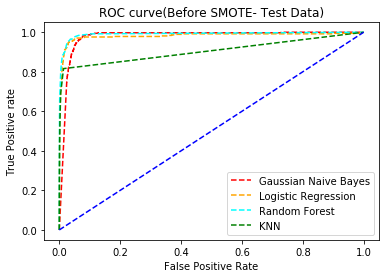

In [69]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Gaussian Naive Bayes')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='cyan', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve(Before SMOTE- Test Data)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## As the training data is highly imbalanced so we will try SMOTE technique to balance the dataset

In [70]:
from collections import Counter
print("Before SMOTE", Counter(y_train))

Before SMOTE Counter({0: 59000, 1: 1000})


In [71]:
X_train_pca_smote,y_train_smote =SMOTE(sampling_strategy='minority').fit_sample(X_train_pca,y_train)

In [72]:
from collections import Counter
print("After SMOTE", Counter(y_train_smote))

After SMOTE Counter({0: 59000, 1: 59000})


## Train model using resampled training data (SMOTE)

In [73]:
model_gnb_smote,metric_compare_smote = train_model_baseline('GNB',X_train_pca_smote,y_train_smote,metric_compare_smote)

GaussianNB Cross Validation Score [0.87063559 0.86694915 0.86275424 0.86686441 0.86139831]
Average Cross-Val Score:  0.865720338983051
Time to Train the GaussianNB: 2 seconds, 44 millisec


In [74]:
model_logr_smote,metric_compare_smote = train_model_baseline('LogR',X_train_pca_smote,y_train_smote,metric_compare_smote)

LogisticRegression Cross Validation Score [0.95351695 0.95449153 0.95427966 0.95415254 0.95372881]
Average Cross-Val Score:  0.9540338983050848
Time to Train the LogisticRegression: 36 seconds, 950 millis


In [75]:
model_rf_smote,metric_compare_smote = train_model_baseline('RF',X_train_pca_smote,y_train_smote,metric_compare_smote)

RandomForestClassifier Cross Validation Score [0.99322034 0.99423729 0.9934322  0.99377119 0.99372881]
Average Cross-Val Score:  0.9936779661016949
Time to Train the RandomForestClassifier: 11 minutes, 41 seconds


In [76]:
model_svm_smote,metric_compare_smote = train_model_baseline('SVM',X_train_pca_smote,y_train_smote,metric_compare_smote)

SVC Cross Validation Score [0.98016949 0.9815678  0.9809322  0.98207627 0.98161017]
Average Cross-Val Score:  0.9812711864406779
Time to Train the SVC: 1 hour, 36 minutes, 2 


In [77]:
model_knn_smote,metric_compare_smote = train_model_baseline('KNN',X_train_pca_smote,y_train_smote,metric_compare_smote)

KNeighborsClassifier Cross Validation Score [0.98805085 0.98716102 0.98944915 0.98889831 0.9890678 ]
Average Cross-Val Score:  0.9885254237288136
Time to Train the KNeighborsClassifier: 4 minutes, 28 seconds,


## Test the model performance with resample training and original test data (After SMOTE)

In [78]:
metric_compare_smote,y_pred_train_gnb_sm =  test_model(model_gnb_smote,X_train_pca_smote,y_train_smote,'train',metric_compare_smote)

Time to test the GaussianNB: 442 milliseconds, 711 


In [79]:
metric_compare_smote,y_pred_test_gnb_sm =  test_model(model_gnb_smote,X_test_pca,y_test,'test',metric_compare_smote)

Time to test the GaussianNB: 109 milliseconds, 693 


In [80]:
metric_compare_smote,y_pred_train_logr_sm =  test_model(model_logr_smote,X_train_pca_smote,y_train_smote,'train',metric_compare_smote)

Time to test the LogisticRegression: 32 milliseconds, 225 m


In [81]:
metric_compare_smote,y_pred_test_logr_sm =  test_model(model_logr_smote,X_test_pca,y_test,'test',metric_compare_smote)

Time to test the LogisticRegression: 4 milliseconds, 326 mi


In [82]:
metric_compare_smote,y_pred_train_rf_sm =  test_model(model_rf_smote,X_train_pca_smote,y_train_smote,'train',metric_compare_smote)

Time to test the RandomForestClassifier: 1 second, 901 millisec


In [83]:
metric_compare_smote,y_pred_test_rf_sm =  test_model(model_rf_smote,X_test_pca,y_test,'test',metric_compare_smote)

Time to test the RandomForestClassifier: 245 milliseconds, 164 


In [84]:
metric_compare_smote,y_pred_train_svm_sm =  test_model(model_svm_smote,X_train_pca_smote,y_train_smote,'train',metric_compare_smote)

Time to test the SVC: 2 minutes, 20 seconds,


In [85]:
metric_compare_smote,y_pred_test_svm_sm =  test_model(model_svm_smote,X_test_pca,y_test,'test',metric_compare_smote)

Time to test the SVC: 19 seconds, 140 millis


In [86]:
metric_compare_smote,y_pred_train_knn_sm =  test_model(model_knn_smote,X_train_pca_smote,y_train_smote,'train',metric_compare_smote)

Time to test the KNeighborsClassifier: 4 minutes, 35 seconds,


In [87]:
metric_compare_smote,y_pred_test_knn_sm =  test_model(model_knn_smote,X_test_pca,y_test,'test',metric_compare_smote)

Time to test the KNeighborsClassifier: 1 minute, 7 seconds, 2


In [88]:
metric_compare_smote

,GNB(Train),GNB(Test),LogR(Train),LogR(Test),RF(Train),RF(Test),SVM(Train),SVM(Test),KNN(Train),KNN(Test)
Avg_CV_Score(%),86.57,NaN,95.4,NaN,99.37,NaN,98.13,NaN,98.85,NaN
True_Negative,57069,15144,57560,15251,59000,15488,58823,15363,58117,15333
False_Positive,1931,481,1440,374,0,137,177,262,883,292
False_Negative,13914,66,3872,25,0,58,956,40,13,51
True_Positive,45086,309,55128,350,59000,317,58044,335,58987,324
Accuracy(%),86.57,96.58,95.5,97.51,100,98.78,99.04,98.11,99.24,97.86
Precision(%),95.89,39.11,97.45,48.34,100,69.82,99.7,56.11,98.53,52.6
Senstivity(Recall)(%),76.42,82.4,93.44,93.33,100,84.53,98.38,89.33,99.98,86.4
Specificity(%),96.73,96.92,97.56,97.61,100,99.12,99.7,98.32,98.5,98.13
F1-Score,0.851,0.53,0.954,0.637,1,0.765,0.99,0.689,0.992,0.654


In [366]:
training_time_metric_smote  = metric_compare_smote.loc[['Training_Time(sec)'],training_time_col]
training_time_metric_smote

,GNB(Train),LogR(Train),RF(Train),SVM(Train),KNN(Train)
Training_Time(sec),2.04,36.95,701.25,5762.45,268.36


In [217]:
metric_cm_smote= metric_compare_smote.loc[index_cm,['GNB(Test)','LogR(Test)','RF(Test)','SVM(Test)','KNN(Test)']]
metric_cm_smote

,GNB(Test),LogR(Test),RF(Test),SVM(Test),KNN(Test)
True_Negative,15144,15251,15488,15363,15333
False_Positive,481,374,137,262,292
False_Negative,66,25,58,40,51
True_Positive,309,350,317,335,324
Total_Cost,37810,16240,30370,22620,28420


In [218]:
metric_score_smote= metric_compare_smote.loc[index_score,col]
metric_score_smote

,GNB(Test),LogR(Test),RF(Test),SVM(Test),KNN(Test)
Accuracy(%),96.58,97.51,98.78,98.11,97.86
Precision(%),39.11,48.34,69.82,56.11,52.6
Senstivity(Recall)(%),82.4,93.33,84.53,89.33,86.4
Specificity(%),96.92,97.61,99.12,98.32,98.13
F1-Score,0.53,0.637,0.765,0.689,0.654
Geometric_Mean,0.894,0.954,0.915,0.937,0.921


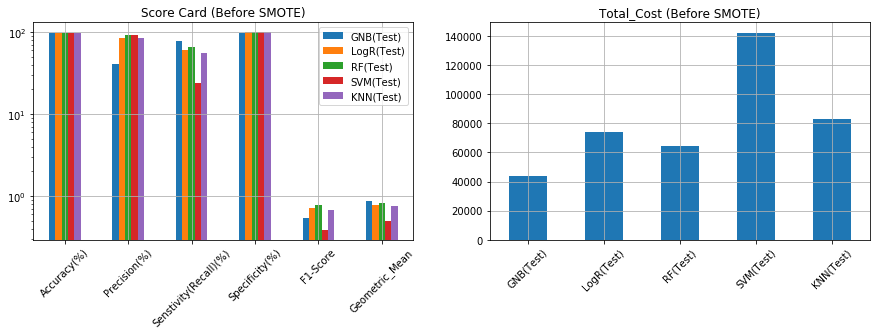

In [279]:
fig,axis=plt.subplots(1,2,figsize=(15,4))
ax1=axis[0]
ax2=axis[1]


metric_score.plot(kind='bar',logy=True,grid=True,rot=45,title="Score Card (Before SMOTE)",stacked=False,ax=ax1,sharex=True)
metric_cm.loc['Total_Cost'].plot(kind='bar',logy=False,grid=True,rot=45,title="Total_Cost (Before SMOTE)",stacked=True,ax=ax2)



fig.savefig("Metrics_withoutSmote",dpi=500)

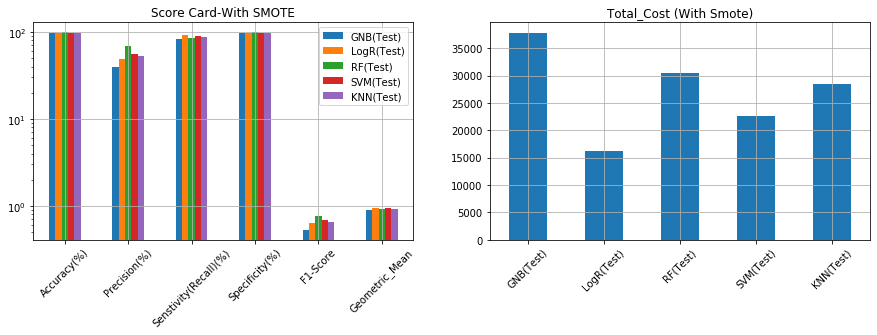

In [276]:
fig1,axis1=plt.subplots(1,2,figsize=(15,4))
ax3=axis1[0]
ax4=axis1[1]


metric_score_smote.plot(kind='bar',logy=True,grid=True,rot=45,title="Score Card-With SMOTE",stacked=False,ax=ax3)
metric_cm_smote.loc['Total_Cost'].plot(kind='bar',logy=False,grid=True,rot=45,title="Total_Cost (With Smote)",stacked=False,ax=ax4)
plt.show()

fig1.savefig("Metrics_withSmote",dpi=500)

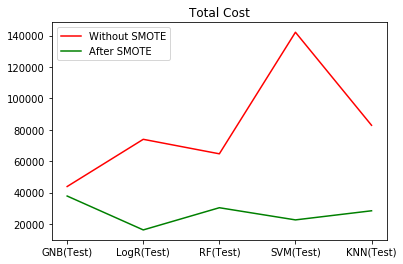

In [341]:
plt.title('Total Cost')
plt.plot(metric_cm_smote.columns,metric_cm.loc['Total_Cost'], color='red',label='Without SMOTE')
plt.plot(metric_cm_smote.columns,metric_cm_smote.loc['Total_Cost'], color='green',label='After SMOTE')
plt.legend(loc='best')

plt.savefig('metric_totalCost_100',dpi=300)
plt.show()

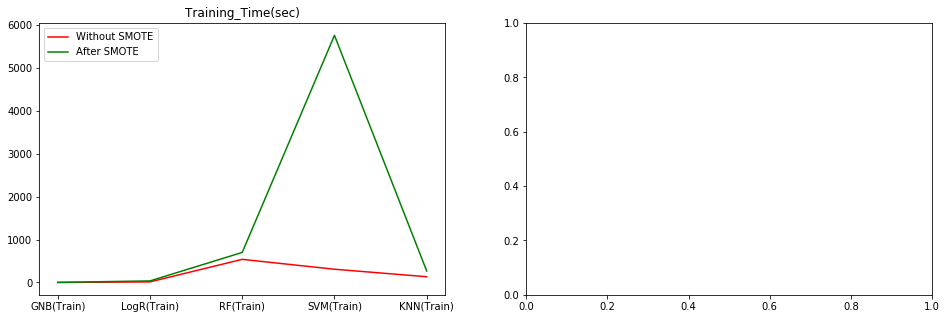

In [387]:
fig,axis = plt.subplots(1,2,figsize=(16,5))
ax1=axis[0]
ax2=axis[1]


ax1.title.set_text('Training_Time(sec)')

ax1.plot(training_time_metric.columns,training_time_metric.loc['Training_Time(sec)'], color='red',label='Without SMOTE')
ax1.plot(training_time_metric_smote.columns,training_time_metric_smote.loc['Training_Time(sec)'], color='green',label='After SMOTE')
ax1.legend(loc='best')

# ax2.title.set_text('Testing_Time(sec)')
# ax2.plot(training_time_metric.columns,training_time_metric.loc['Testing_Time(sec)'], color='red',label='Without SMOTE')
# ax2.plot(col,training_time_metric_smote.loc['Testing_Time(sec)'], color='green',label='After SMOTE')
# ax2.legend(loc='best')



plt.show()
fig.savefig('metrics_103',dpi=300)

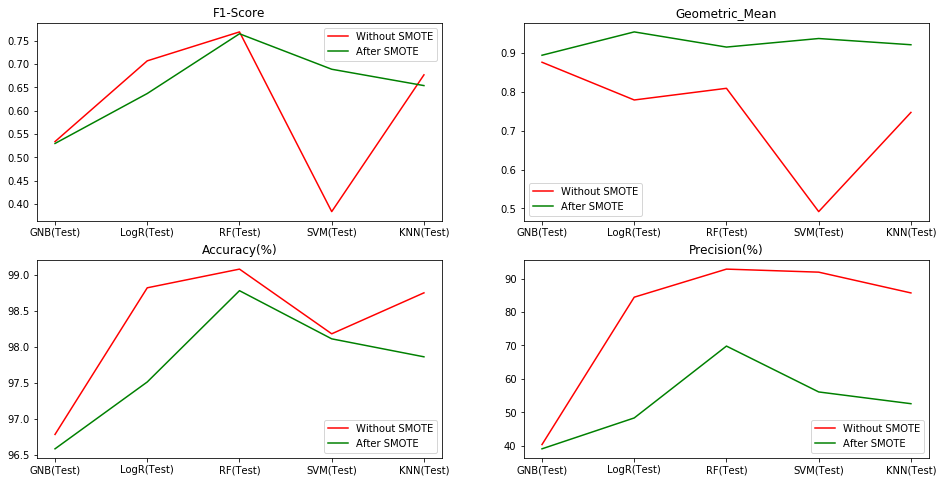

In [386]:
fig,axis = plt.subplots(2,2,figsize=(16,8))
ax1=axis[0][0]
ax2=axis[0][1]

ax3=axis[1][0]
ax4=axis[1][1]

ax1.title.set_text('F1-Score')

ax1.plot(metric_cm_smote.columns,metric_score.loc['F1-Score'], color='red',label='Without SMOTE')
ax1.plot(metric_cm_smote.columns,metric_score_smote.loc['F1-Score'], color='green',label='After SMOTE')
ax1.legend(loc='best')

ax2.title.set_text('Geometric_Mean')
ax2.plot(metric_cm_smote.columns,metric_score.loc['Geometric_Mean'], color='red',label='Without SMOTE')
ax2.plot(metric_cm_smote.columns,metric_score_smote.loc['Geometric_Mean'], color='green',label='After SMOTE')
ax2.legend(loc='best')

ax3.title.set_text('Accuracy(%)')
ax3.plot(metric_cm_smote.columns,metric_score.loc['Accuracy(%)'], color='red',label='Without SMOTE')
ax3.plot(metric_cm_smote.columns,metric_score_smote.loc['Accuracy(%)'], color='green',label='After SMOTE')
ax3.legend(loc='best')

ax4.title.set_text('Precision(%)')
ax4.plot(metric_cm_smote.columns,metric_score.loc['Precision(%)'], color='red',label='Without SMOTE')
ax4.plot(metric_cm_smote.columns,metric_score_smote.loc['Precision(%)'], color='green',label='After SMOTE')
ax4.legend(loc='best')



plt.show()
fig.savefig('metrics_100',dpi=300)

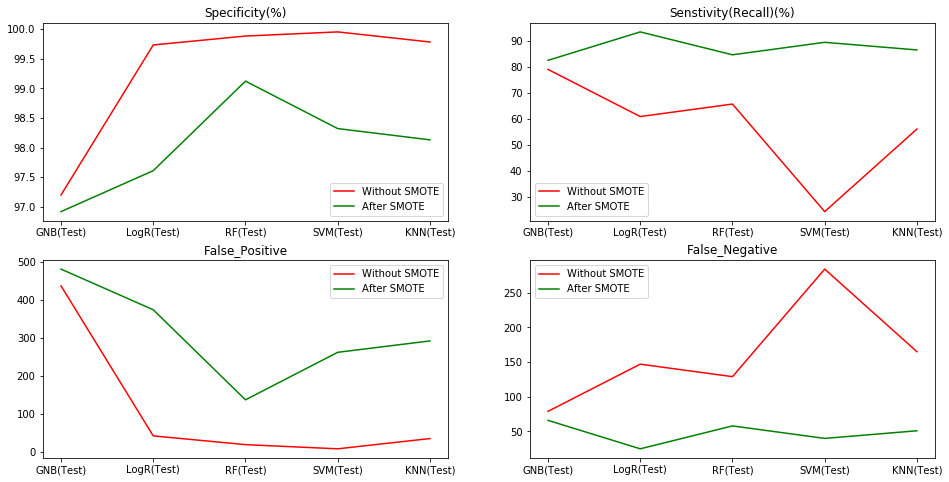

In [338]:
fig,axis = plt.subplots(2,2,figsize=(16,8))
ax1=axis[0][0]
ax2=axis[0][1]

ax3=axis[1][0]
ax4=axis[1][1]

ax2.title.set_text('Senstivity(Recall)(%)')

ax2.plot(metric_cm_smote.columns,metric_score.loc['Senstivity(Recall)(%)'], color='red',label='Without SMOTE')
ax2.plot(metric_cm_smote.columns,metric_score_smote.loc['Senstivity(Recall)(%)'], color='green',label='After SMOTE')
ax2.legend(loc='best')

ax1.title.set_text('Specificity(%)')
ax1.plot(metric_cm_smote.columns,metric_score.loc['Specificity(%)'], color='red',label='Without SMOTE')
ax1.plot(metric_cm_smote.columns,metric_score_smote.loc['Specificity(%)'], color='green',label='After SMOTE')
ax1.legend(loc='best')

ax3.title.set_text('False_Positive')
ax3.plot(metric_cm_smote.columns,metric_cm.loc['False_Positive'], color='red',label='Without SMOTE')
ax3.plot(metric_cm_smote.columns,metric_cm_smote.loc['False_Positive'], color='green',label='After SMOTE')
ax3.legend(loc='best')

ax4.title.set_text('False_Negative')
ax4.plot(metric_cm_smote.columns,metric_cm.loc['False_Negative'], color='red',label='Without SMOTE')
ax4.plot(metric_cm_smote.columns,metric_cm_smote.loc['False_Negative'], color='green',label='After SMOTE')
ax4.legend(loc='best')



plt.show()
fig.savefig('metrics_101',dpi=300)

## ROC and ROC-AUC curve

In [94]:
# predict probabilities for each model on test data
pred_prob_gnb_smote = model_gnb_smote.predict_proba(X_test_pca)
pred_prob_logr_smote = model_logr_smote.predict_proba(X_test_pca)
pred_prob_rf_smote = model_rf_smote.predict_proba(X_test_pca)
pred_prob_knn_smote = model_knn_smote.predict_proba(X_test_pca)


In [95]:
# roc curve for models
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_gnb_smote[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_logr_smote[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob_rf_smote[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob_knn_smote[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr_2, p_tpr_2, _2 = roc_curve(y_test, random_probs, pos_label=1)

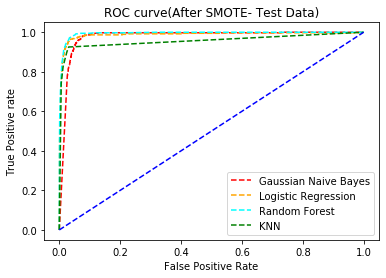

In [96]:
# plot roc curves
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='Gaussian Naive Bayes')
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr7, tpr7, linestyle='--',color='cyan', label='Random Forest')
plt.plot(fpr8, tpr8, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr_2, p_tpr_2, linestyle='--', color='blue')
# title
plt.title('ROC curve(After SMOTE- Test Data)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_afterSMOTE',dpi=300)
plt.show();

### Store metrics result into csv file

In [388]:
metric_compare.to_csv("Metrics_without_Smote_v1.1.csv",header=True)

In [389]:
metric_compare_smote.to_csv("Metrics_with_Smote_v1.1.csv",header=True)

## Tuning of the classification models - Be advised it is computation expensive 

#### We will use RandomizedSearchCV method for parameters tuning

In [ ]:
from sklearn.metrics import make_scorer

def custom_scorer(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp+500*fn
    return cost

score_func = make_scorer(custom_scorer, greater_is_better=False)

### k-NN classifier

In [ ]:
rand_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
n_neighbors = range(1, 31)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

rand_search = RandomizedSearchCV(rand_knn ,param_grid,cv=10,scoring=score_func)
rand_result = rand_search.fit(X_train_pca_smote, y_train_smote)


In [ ]:
print(rand_search.best_params_)
print(rand_search.best_score_)

In [ ]:
temp=KNeighborsClassifier(weights='distance',metric='euclidean',n_neighbors=2)

In [ ]:
temp.fit(X_train_pca_smote,y_train_smote)

In [ ]:
metric_compare_Tuned,y_pred_test =  test_model(temp,X_train_pca_smote,y_train_smote,'train',metric_compare_Tuned)

In [ ]:
metric_compare_Tuned

In [ ]:
metric_compare_Tuned,y_pred_test =  test_model(temp,X_test_pca,y_test,'test',metric_compare_Tuned)

In [ ]:
metric_compare_Tuned

### Logistic regression

In [ ]:
# Logistic Regression tuning hyperparameter
solver_options = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [1000,100, 10, 1.0, 0.1, 0.01]
max_iter_option = [100,500,1000,1500]
param_grid = dict(max_iter= max_iter_option,solver = solver_options,\
                  C=c_values)


In [ ]:
logr =LogisticRegression(solver='lbfgs',max_iter=100,n_jobs=-1)

In [ ]:
rand = RandomizedSearchCV(logr,param_grid,cv=10,scoring=score_func)

In [ ]:
rand.fit(X_train_pca_smote, y_train_smote)

In [ ]:
print(rand.best_params_)
print(rand.best_score_)

In [ ]:
print(rand.best_estimator_)

In [ ]:
lr_opt =LogisticRegression(solver='lbfgs', max_iter= 500, C= 0.1,random_state=0)

In [ ]:
lr_opt.fit(X_train_pca_smote,y_train_smote)

In [ ]:
metric_compare_Tuned,y_pred_train =  test_model(lr_opt,X_train_pca_smote,y_train_smote,'train',metric_compare_Tuned)

In [ ]:
metric_compare_Tuned,y_pred_test =  test_model(lr_opt,X_test_pca,y_test,'test',metric_compare_Tuned)

In [ ]:
metric_compare_Tuned.loc['Cost(Score)']

## Additional experiment:  Re-apply PCA after performing SMOTE

In [112]:
pca1 = PCA(n_components=0.95,random_state=0)

In [113]:
# fit the PCA instance on the SMOTE training data
pca1.fit(X_train_pca_smote)

PCA(n_components=0.95, random_state=0)

In [114]:
pca1.n_components_

44

In [115]:
# apply transform on both the training and test set to generate a transformed dataset from 
# the parameters generated from the fit method.

X_train_pca_smote2 = pca1.transform(X_train_pca_smote)
X_test_pca_2 = pca1.transform(X_test_pca)

In [116]:
X_train_pca_smote2.shape

(118000, 44)

In [117]:
X_test_pca_2.shape

(16000, 44)

In [118]:
pca1.explained_variance_ratio_

array([0.33114339, 0.10436177, 0.05579972, 0.04761427, 0.0420924 ,
       0.03302736, 0.03151058, 0.02772388, 0.02548217, 0.01942341,
       0.01579639, 0.01476078, 0.01376672, 0.01220493, 0.01168784,
       0.01044468, 0.0098112 , 0.00940746, 0.00911052, 0.00864104,
       0.00814885, 0.00782998, 0.00765677, 0.0071613 , 0.00677342,
       0.00639788, 0.0063066 , 0.00591985, 0.00574786, 0.00530059,
       0.00482801, 0.00459751, 0.00424986, 0.00412757, 0.00387599,
       0.00381747, 0.00366363, 0.00353458, 0.00349601, 0.00327208,
       0.00312995, 0.0030175 , 0.0029986 , 0.00286549])

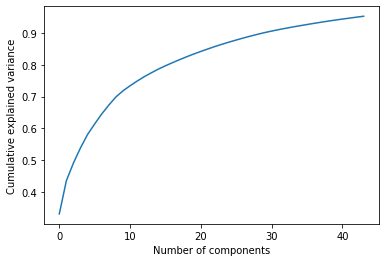

In [119]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.savefig('PCA_Components_pca2',dpi=300)
plt.show()

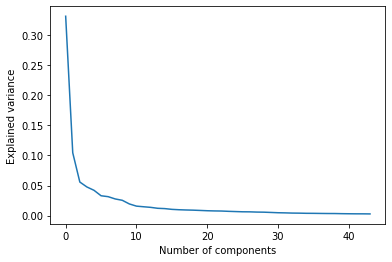

In [120]:
# plt.subplots(figsize=(15,10))
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
# plt.xticks(np.arange(0,85,step=1))

plt.savefig('PCA_Components_Variance_pca2',dpi=300)
plt.show()

In [122]:
metric_compare_smote2 = metric_compare_Tuned.copy(deep=True)

## train the model

In [123]:
model_gnb_smote2,metric_compare_smote2 = train_model_baseline('GNB',X_train_pca_smote2,y_train_smote,metric_compare_smote2)

GaussianNB Cross Validation Score [0.89631356 0.89245763 0.89313559 0.89889831 0.8904661 ]
Average Cross-Val Score:  0.8942542372881357
Time to Train the GaussianNB: 1 second, 472 millisec


In [124]:
model_logr_smote2,metric_compare_smote2 = train_model_baseline('LogR',X_train_pca_smote2,y_train_smote,metric_compare_smote2)

LogisticRegression Cross Validation Score [0.94716102 0.94423729 0.94682203 0.94758475 0.94669492]
Average Cross-Val Score:  0.9465000000000001
Time to Train the LogisticRegression: 11 seconds, 232 millis


In [125]:
model_rf_smote2,metric_compare_smote2 = train_model_baseline('RF',X_train_pca_smote2,y_train_smote,metric_compare_smote2)

RandomForestClassifier Cross Validation Score [0.99224576 0.99347458 0.99271186 0.99245763 0.99322034]
Average Cross-Val Score:  0.9928220338983049
Time to Train the RandomForestClassifier: 7 minutes, 21 seconds,


In [130]:
model_svm_smote2,metric_compare_smote2 = train_model_baseline('SVM',X_train_pca_smote2,y_train_smote,metric_compare_smote2)

SVC Cross Validation Score [0.97720339 0.97826271 0.97834746 0.97779661 0.97838983]
Average Cross-Val Score:  0.978
Time to Train the SVC: 1 hour, 20 minutes, 4 


In [131]:
model_knn_smote2,metric_compare_smote2 = train_model_baseline('KNN',X_train_pca_smote2,y_train_smote,metric_compare_smote2)

KNeighborsClassifier Cross Validation Score [0.98682203 0.98724576 0.98800847 0.98682203 0.98822034]
Average Cross-Val Score:  0.9874237288135594
Time to Train the KNeighborsClassifier: 1 minute, 55 seconds, 


## Test the model

In [126]:
metric_compare_smote2,y_pred_test_gnb_sm2 =  test_model(model_gnb_smote2,X_test_pca_2,y_test,'test',metric_compare_smote2)

Time to test the GaussianNB: 27 milliseconds, 377 m


In [127]:
metric_compare_smote2,y_pred_test_logr_sm2 =  test_model(model_logr_smote2,X_test_pca_2,y_test,'test',metric_compare_smote2)

Time to test the LogisticRegression: 2 milliseconds, 635 mi


In [128]:
metric_compare_smote2,y_pred_test_rf_sm2 =  test_model(model_rf_smote2,X_test_pca_2,y_test,'test',metric_compare_smote2)

Time to test the RandomForestClassifier: 238 milliseconds, 75 m


In [132]:
metric_compare_smote2,y_pred_test_svm_sm2 =  test_model(model_svm_smote2,X_test_pca_2,y_test,'test',metric_compare_smote2)

Time to test the SVC: 11 seconds, 246 millis


In [133]:
metric_compare_smote2,y_pred_test_knn_sm2 =  test_model(model_knn_smote2,X_test_pca_2,y_test,'test',metric_compare_smote2)

Time to test the KNeighborsClassifier: 33 seconds, 159 millis


In [135]:
metric_compare_smote2

,GNB(Train),GNB(Test),LogR(Train),LogR(Test),RF(Train),RF(Test),SVM(Train),SVM(Test),KNN(Train),KNN(Test)
Avg_CV_Score(%),89.43,NaN,94.65,NaN,99.28,NaN,97.8,NaN,98.74,NaN
True_Negative,NaN,15141,NaN,15231,NaN,15479,NaN,15342,NaN,15314
False_Positive,NaN,484,NaN,394,NaN,146,NaN,283,NaN,311
False_Negative,NaN,58,NaN,24,NaN,54,NaN,33,NaN,49
True_Positive,NaN,317,NaN,351,NaN,321,NaN,342,NaN,326
Accuracy(%),NaN,96.61,NaN,97.39,NaN,98.75,NaN,98.02,NaN,97.75
Precision(%),NaN,39.58,NaN,47.11,NaN,68.74,NaN,54.72,NaN,51.18
Senstivity(Recall)(%),NaN,84.53,NaN,93.6,NaN,85.6,NaN,91.2,NaN,86.93
Specificity(%),NaN,96.9,NaN,97.48,NaN,99.07,NaN,98.19,NaN,98.01
F1-Score,NaN,0.539,NaN,0.627,NaN,0.762,NaN,0.684,NaN,0.644


In [137]:
metric_compare_smote2.to_csv("Metrics_with_Smote2_v1.1.csv",header=True)

# individual model metrics for paper

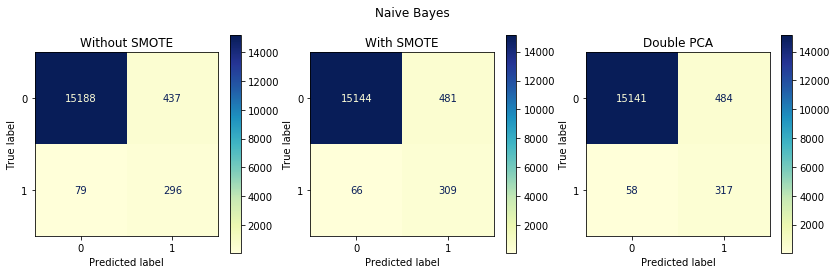

In [435]:
fig,axis = plt.subplots(1,3,figsize=(14,4))
ax1=axis[0]
ax2 =axis[1]
ax3=axis[2]
plt.suptitle("Naive Bayes")
ax1.title.set_text('Without SMOTE')
ax2.title.set_text('With SMOTE')
ax3.title.set_text('Double PCA')
metrics.plot_confusion_matrix(model_gnb,X_test_pca,y_test,ax=ax1,cmap='YlGnBu')
metrics.plot_confusion_matrix(model_gnb_smote,X_test_pca,y_test,ax=ax2,cmap='YlGnBu')
metrics.plot_confusion_matrix(model_gnb_smote2,X_test_pca_2,y_test,ax=ax3,cmap='YlGnBu')
plt.savefig('NB_ConfusionMatrix',dpi=300)
plt.show()

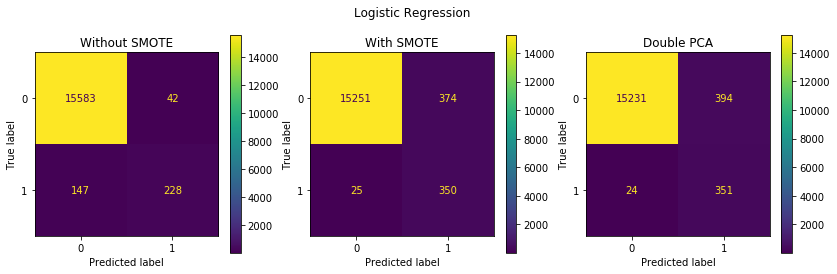

In [437]:
fig,axis = plt.subplots(1,3,figsize=(14,4))
ax1=axis[0]
ax2 =axis[1]
ax3=axis[2]
plt.suptitle("Logistic Regression")
ax1.title.set_text('Without SMOTE')
ax2.title.set_text('With SMOTE')
ax3.title.set_text('Double PCA')
metrics.plot_confusion_matrix(model_logr,X_test_pca,y_test,ax=ax1,)
metrics.plot_confusion_matrix(model_logr_smote,X_test_pca,y_test,ax=ax2)
metrics.plot_confusion_matrix(model_logr_smote2,X_test_pca_2,y_test,ax=ax3)
plt.savefig('LR_ConfusionMatrix',dpi=300)
plt.show()

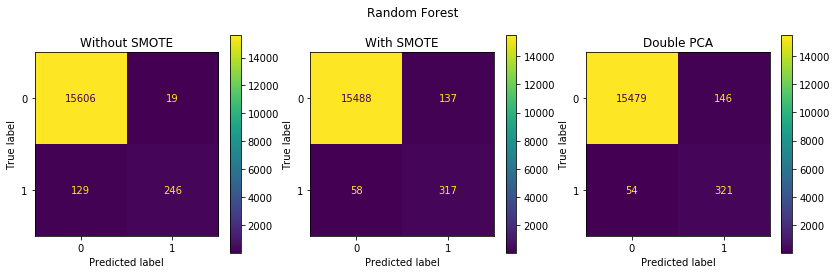

In [436]:
fig,axis = plt.subplots(1,3,figsize=(14,4))
ax1=axis[0]
ax2 =axis[1]
ax3=axis[2]
plt.suptitle("Random Forest")
ax1.title.set_text('Without SMOTE')
ax2.title.set_text('With SMOTE')
ax3.title.set_text('Double PCA')
metrics.plot_confusion_matrix(model_rf,X_test_pca,y_test,ax=ax1)
metrics.plot_confusion_matrix(model_rf_smote,X_test_pca,y_test,ax=ax2)
metrics.plot_confusion_matrix(model_rf_smote2,X_test_pca_2,y_test,ax=ax3)
plt.savefig('RF_ConfusionMatrix',dpi=300)
plt.show()

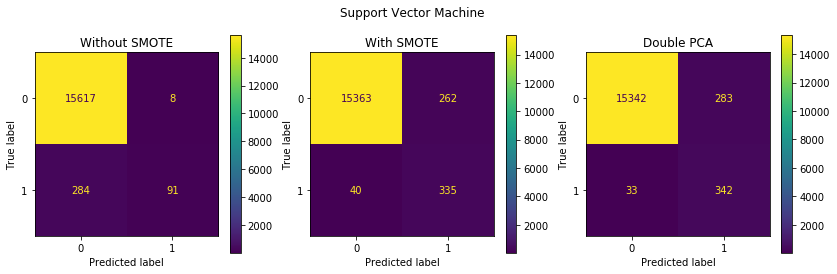

In [455]:
fig,axis = plt.subplots(1,3,figsize=(14,4))
ax1=axis[0]
ax2 =axis[1]
ax3=axis[2]
plt.suptitle("Support Vector Machine")
ax1.title.set_text('Without SMOTE')
ax2.title.set_text('With SMOTE')
ax3.title.set_text('Double PCA')
metrics.plot_confusion_matrix(model_svm,X_test_pca,y_test,ax=ax1)
metrics.plot_confusion_matrix(model_svm_smote,X_test_pca,y_test,ax=ax2)
metrics.plot_confusion_matrix(model_svm_smote2,X_test_pca_2,y_test,ax=ax3)
plt.savefig('svn_ConfusionMatrix',dpi=300)
plt.show()

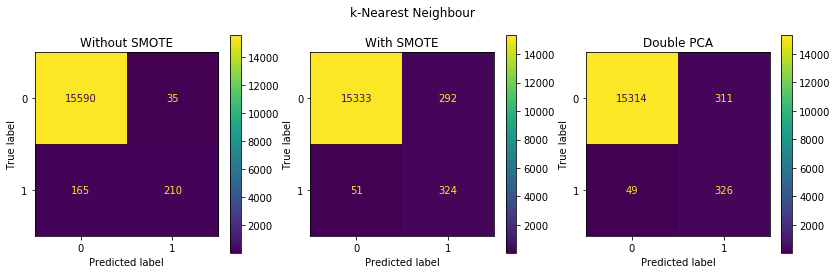

In [456]:
fig,axis = plt.subplots(1,3,figsize=(14,4))
ax1=axis[0]
ax2 =axis[1]
ax3=axis[2]
plt.suptitle("k-Nearest Neighbour")
ax1.title.set_text('Without SMOTE')
ax2.title.set_text('With SMOTE')
ax3.title.set_text('Double PCA')
metrics.plot_confusion_matrix(model_knn,X_test_pca,y_test,ax=ax1)
metrics.plot_confusion_matrix(model_knn_smote,X_test_pca,y_test,ax=ax2)
metrics.plot_confusion_matrix(model_knn_smote2,X_test_pca_2,y_test,ax=ax3)
plt.savefig('knn_ConfusionMatrix',dpi=300)
plt.show()